In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
df = pd.read_csv('house_data.csv')

In [67]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [68]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [69]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [70]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [71]:
correlation_matrix = df.corr(numeric_only=True)

<Axes: >

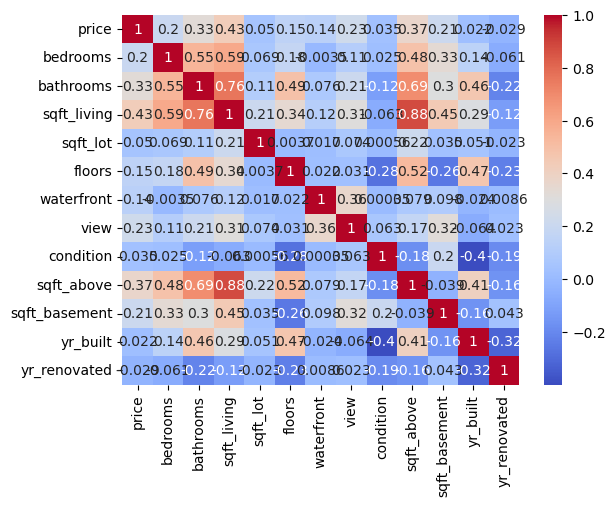

In [72]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [73]:
plt.show()

In [84]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [87]:
print("model coefficient (slop = ) : ",model.coef_)
print("\nmodel intercept : ", model.intercept_)

model coefficient (slop = ) :  [-5.67973995e+04 -8.72741025e+03  2.85272386e+02 -5.64912041e-01
  3.89313870e+04  4.07431460e+05  5.58540148e+04  5.67712094e+04]

model intercept :  -116007.95741764095


In [88]:
predicted = model.predict(X_test)

print("\n Predicated Prices :", predicted )


 Predicated Prices : [ 355544.20022939  412466.5623668  1032309.01472582  638015.89691907
  386749.03170829  682878.667747    508131.51104766  476444.88868463
  528390.38064681  536890.28432085  741611.25431843  351089.54001044
  834594.23596617  507916.36533316  395783.43614511  753604.01071734
  591260.93521145  519685.21314887 1097684.01387223  899350.51526602
 1416428.6326903   655027.54695318  633467.15674173  508825.54646739
  241505.58246676  246422.08147022  682315.40782008  890710.02853439
  343999.53755842  869713.47838407 1706568.09689498  423119.45957645
 1166554.09905235  473485.51556241  222390.24850492  389364.9804021
  837334.18734898  791445.99802151  309102.96122708  591268.41401418
  412892.26769615  330863.44338481  425901.2300032   395309.75466787
  321469.19939767  278850.88655021  505322.563497    530072.20069206
  827342.2152062   301425.32433139 1238909.15392266  365386.74029855
  441659.23383865  652940.88315571  281396.58930844  330386.21781349
 1000352.6327

In [89]:
print("\n Actaul Prices : ")
y_test


 Actaul Prices : 


3683      544000.0
4411           0.0
2584     1712500.0
69        365000.0
1844      275000.0
           ...    
1612      750000.0
1068      230000.0
4350    26590000.0
3027      687000.0
3455      289659.0
Name: price, Length: 920, dtype: float64

In [90]:
mse = mean_squared_error(y_test, predicted)
mae =mean_absolute_error(y_test,predicted )
r2 = r2_score(y_test, predicted)

print("Mean Squared Error:", mse)
print("Mean Absolute Error = ",mae)
print("R-squared:", r2)

Mean Squared Error: 986869414953.9674
Mean Absolute Error =  215838.55739941273
R-squared: 0.03233518995626383


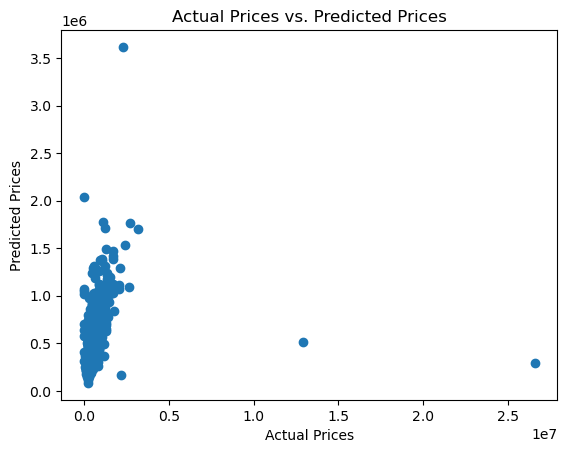

In [91]:
plt.scatter(y_test, predicted)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

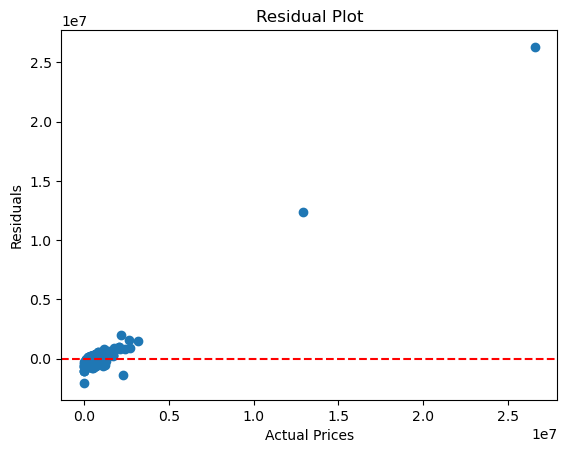

In [95]:
residuals = y_test - predicted
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [94]:
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 331038.96876931586


E:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
